In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
data = pd.read_csv('multiple_linear_regression.csv')
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [26]:
output_col = 'Target'
x = data.iloc[:, data.columns != output_col]
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [27]:
y = data.iloc[:, data.columns == output_col]
y.head()

,Target
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

In [29]:
print(data.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(200, 4) (140, 3) (60, 3) (140, 1) (60, 1)


In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [32]:
lr.intercept_

array([3.0777745])

In [33]:
pred_value = lr.predict(x_test)

In [34]:
cost = mean_squared_error(y_test, pred_value)
print(cost)

2.241286253093347


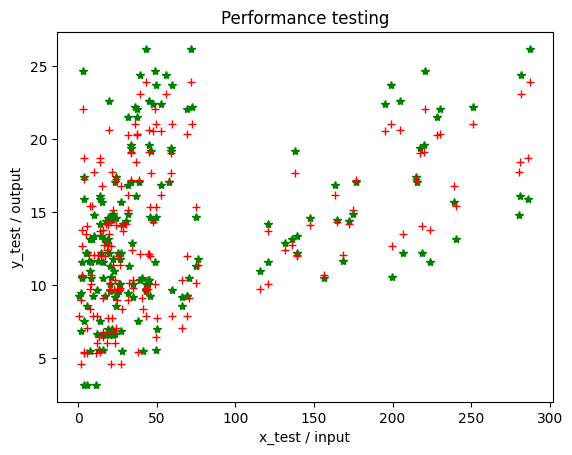

In [35]:
plt.plot(x_test, y_test, '*', color='green')
plt.plot(x_test, pred_value, '+', color='red')
plt.title('Performance testing')
plt.xlabel('x_test / input')
plt.ylabel('y_test / output')
plt.show()

In [ ]:
# assumptions of linear regression
# 1. Linearity -- linear relationship between x and y
# 2. Homoscedasticity -- constant variance of error terms (residuals)
# 3. Multivariate normality -- normal distribution of error terms (residuals I.e. y-y_hat) ( y_hat = predicted value)

In [40]:
residuals = y_test - pred_value
residuals.head()

,Target
56,-2.917101
37,-0.661461
67,1.313807
79,1.240469
80,0.422008


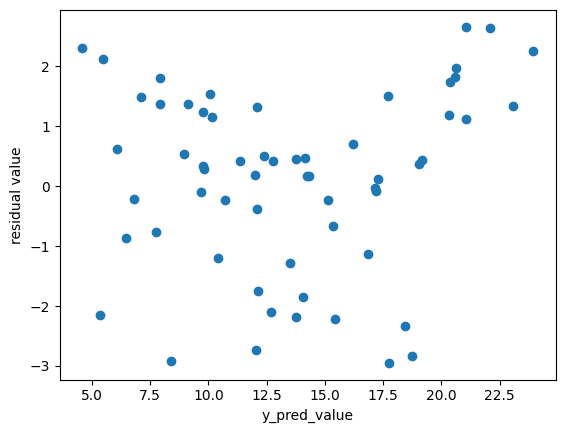

In [41]:
plt.scatter(pred_value, residuals)
plt.xlabel('y_pred_value')
plt.ylabel('residual value')
plt.show()

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_14140\1841234233.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<AxesSubplot: ylabel='Density'>

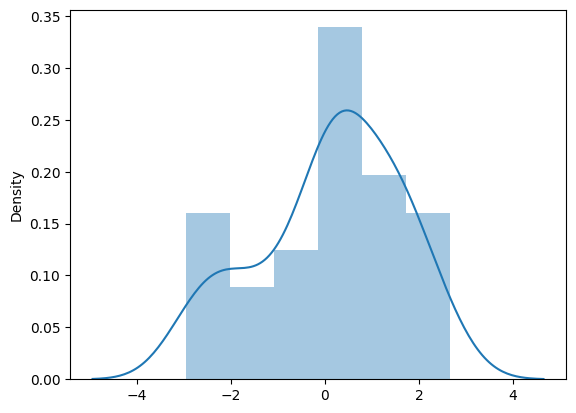

In [42]:
import seaborn as sns
sns.distplot(residuals)

### Ordinary Least Square(OLS) Method

In [45]:
import statsmodels.api as sm

In [46]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
x_with_constant = sm.add_constant(x_train)
x_with_constant.head()

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9


In [48]:
model = sm.OLS(y_train, x_with_constant)
result = model.fit()
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [49]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.67e-63
Time:                        17:23:25   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [ ]:
# higher value of feature 3 in p>|t|, so we can remove it and check the model again

In [50]:
x_test = sm.add_constant(x_test)
y_pred = result.predict(x_test)
y_pred.head()

56     8.417101
37    15.361461
67    12.086193
79     9.759531
80    11.377992
dtype: float64

In [51]:
x_with_constant.drop('Feature 3', axis=1, inplace=True)
model = sm.OLS(y_train, x_with_constant)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     523.8
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           6.70e-65
Time:                        17:27:44   Log-Likelihood:                -276.51
No. Observations:                 140   AIC:                             559.0
Df Residuals:                     137   BIC:                             567.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0427      0.376      8.085      0.0

In [53]:
x_test.drop('Feature 3', axis=1, inplace=True)
y_pred = result.predict(x_test)
y_pred.head()

56     8.439262
37    15.373044
67    12.055894
79     9.760370
80    11.362642
dtype: float64

In [55]:
cost = mean_squared_error(y_test, y_pred)
print(cost) # cost is reduced after removing feature 3
# earlier cost was 2.24

2.2349594098614385
